In [105]:
%matplotlib inline
import cvxpy as cvx
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import itertools

In [106]:
def get_error(sorted_data, x, p, is_int=False):
    if is_int:
        x = round(x)
    n = len(sorted_data)
    li = np.searchsorted(sorted_data, x, side="left")
    ri = np.searchsorted(sorted_data, x, side="right")
    qi = int(p * n)
    if ri < qi:
        return (qi-ri)*1.0/n
    elif li > qi:
        return (li-qi)*1.0/n
    else:
        return 0.0

In [107]:
precisions = [64, 48, 32, 24, 20, 16, 12, 8]

In [108]:
def gen_plots(df, sorted_data, name):
    dft = df.groupby(
        ["precision", "size_param", "q"]
    )["quantile_estimate", "train_time", "query_time", "space", "bound_size"].mean()
    dft = dft.reset_index()
    dft["error"] = dft.apply(
        lambda r: get_error(
            sorted_data, r["quantile_estimate"], r["q"],
            is_int=False
        ),
        axis=1
    )
    dft["rerror"] = dft["error"] / np.minimum(dft["q"],(1-dft["q"]))
    dfg = dft.groupby([
        "precision", "size_param"
    ])["train_time", "query_time", "space", "error", "rerror", "bound_size"].mean()
    dfs = dfg.reset_index().sort_values(["precision"])
    
#     plt.figure()
#     for precision in precisions:
#         c_df = dfs[dfs["precision"] == precision]
#         plt.loglog(
#             c_df["space"], 
#             (c_df["query_time"])*1e-9,
#             label=precision,
#             marker="."
#         )
#     plt.xlabel("Size (bytes)")
#     plt.ylabel("Query Time (s)")
#     plt.legend(loc=4)
#     plt.title(name)
#     plt.savefig("{}_query_time.pdf".format(name))
    
#     n = len(orig_data)
#     plt.figure()
#     for precision in precisions:
#         c_df = dfs[dfs["precision"] == precision]
#         plt.loglog(
#             c_df["space"], 
#             (c_df["train_time"])/n,
#             label=precision,
#     #         lw=0,
#             marker="."
#         )
#     plt.xlabel("Size (bytes)")
#     plt.ylabel("Update Time (ns)")
#     plt.legend(loc=4)
#     plt.title(name)
#     plt.savefig("{}_update_time.pdf".format(name))
    
#     plt.figure()
#     for precision in precisions:
#         c_df = dfs[dfs["precision"] == precision]
#         plt.loglog(
#             c_df["space"],
#             c_df["error"], 
#             label=precision,
#             marker="."
#         )
#     plt.xlabel("Size (Bytes)")
#     plt.ylabel("Avg Error")
#     plt.legend()
#     plt.title(name)
#     plt.savefig("{}_error.pdf".format(name))

    plt.figure()
    for size in dfs["size_param"].unique():
        c_df = dfs[dfs["size_param"] == size]
        plt.plot(
            c_df["precision"],
            c_df["error"], 
            label=size,
            marker="."
        )
    plt.yscale('log')
    plt.xlabel("Precision (bits per value)")
    plt.ylabel("Avg Error")
    plt.legend()
    plt.title(name)
    
#     plt.figure()
#     for precision in precisions:
#         c_df = dfs[dfs["precision"] == precision]
#         plt.loglog(
#             c_df["space"],
#             c_df["bound_size"], 
#             label=precision,
#             marker="."
#         )
#     plt.xlabel("Size (Bytes)")
#     plt.ylabel("Avg Bound Size")
#     plt.legend()
#     plt.title(name)
#     plt.savefig("{}_bound.pdf".format(name))
    
    return dft

In [109]:
orig_df_milan = pd.read_csv("../sampledata/internet-mi-2013-11-01_09.csv")
orig_data_milan = orig_df_milan["internet"]
sorted_data_milan = np.sort(orig_data_milan)

In [189]:
orig_df_milan_full = pd.read_csv("../sampledata/internet-mi-2013-11.csv")
orig_data_milan_full = orig_df_milan_full["internet"]
sorted_data_milan_full = np.sort(orig_data_milan_full)

In [110]:
# df = pd.read_csv("../javamsketch/results/precision_shuttle.csv")
# orig_data = pd.read_csv("../sampledata/shuttle.csv", usecols=[0])["0"]
# sorted_data = np.sort(orig_data)
# dft = gen_plots(df, sorted_data, "shuttle")

In [111]:
orig_data_exp = pd.read_csv("../sampledata/exponential_10M.csv", usecols=[0])["x"]
sorted_data_exp = np.sort(orig_data_exp)

In [191]:
orig_data_hepmass = pd.read_csv("../sampledata/hepmass_l.csv", usecols=[0]).iloc[:,0]
sorted_data_hepmass = np.sort(orig_data_hepmass)

In [143]:
colormap = {
    3.0: "C0",
    7.0: "C1",
    11.0: "C2",
    15.0: "C3",
#     11.0: "C4",
#     13.0: "C5",
#     15.0: "C6"
}
markers = {
    3.0: "x",
    7.0: "^",
    11.0: "s",
    15.0: "+",
#     11.0: "D",
#     13.0: "o",
#     15.0: "<"
}

In [144]:
def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])

In [145]:
size_params = [3.0, 7.0, 11.0, 15.0]

In [199]:
def gen_plot(df, sorted_data, name):
    f, axs = plt.subplots(1,2, figsize=(6,2.3), sharey=True)
    
    for i in range(2):
        dft = df[i].groupby(
            ["precision", "size_param", "q"]
        )["quantile_estimate", "train_time", "query_time", "space", "bound_size"].mean()
        dft = dft.reset_index()
        dft["error"] = dft.apply(
            lambda r: get_error(
                sorted_data[i], r["quantile_estimate"], r["q"],
                is_int=False
            ),
            axis=1
        )
        dft["rerror"] = dft["error"] / np.minimum(dft["q"],(1-dft["q"]))
        dfg = dft.groupby([
            "precision", "size_param"
        ])["train_time", "query_time", "space", "error", "rerror", "bound_size"].mean()
        dfs = dfg.reset_index().sort_values(["precision"])
    
        ax = axs[i]
        lines = []
        labels = []
#         for size in dfs["size_param"].unique():
        for size in size_params:
            c_df = dfs[dfs["size_param"] == size]
            l, = ax.plot(
                c_df["precision"],
                c_df["error"], 
                label="k = " + str(int(size)-1),
                marker=markers[size],
                color=colormap[size],
                markersize=5,
                ls="dotted",
                lw=1
            )
            lines.append(l)
            labels.append("k = " + str(int(size)-1))
        ax.set_yscale('log')
        ax.set_xlabel("Precision (bits per value)")
        if i == 0:
            ax.set_ylabel("Avg Error")
        ax.set_title(name[i])
        ax.yaxis.grid()
    
    ax.legend(frameon=False)
#     lgd = f.legend(
#         flip(lines, 4), flip(labels, 4),
#         bbox_to_anchor=(0.16, 0.97, 1., .102), ncol=4, loc=2, frameon=False
#     )
    f.tight_layout()
#     plt.savefig("low_precision.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig("low_precision.pdf", bbox_inches='tight')

In [166]:
def preprocess(df_milan, df_hepmass):
    df_milan = df_milan[(df_milan["size_param"] != 15.0) | (df_milan["precision"] != 8.0)]
    df_hepmass = df_hepmass[(df_hepmass["size_param"] != 15.0) | (df_hepmass["precision"] != 8.0)]
    df_hepmass = df_hepmass[(df_hepmass["size_param"] != 11.0) | (df_hepmass["precision"] != 8.0)]
    df_hepmass = df_hepmass[(df_hepmass["size_param"] != 7.0) | (df_hepmass["precision"] != 8.0)]
    return df_milan, df_hepmass

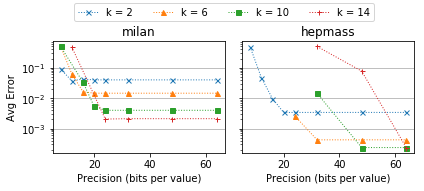

In [174]:
df_milan = pd.read_csv("../javamsketch/results/precision_milan.csv")
# df_exp = pd.read_csv("../javamsketch/results/precision_exp.csv")
df_hepmass = pd.read_csv("../javamsketch/results/precision_hepmass.csv")

df_milan, df_hepmass = preprocess(df_milan, df_hepmass)
_ = gen_plot([df_milan, df_hepmass], [sorted_data_milan, sorted_data_hepmass], ["milan", "hepmass"])

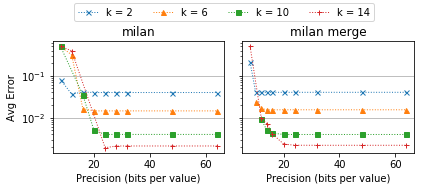

In [190]:
df_milan = pd.read_csv("../javamsketch/results/precision_milan.csv")
df_milan_merge = pd.read_csv("../javamsketch/results/precision_merge_milan.csv")
_ = gen_plot([df_milan, df_milan_merge], [sorted_data_milan, sorted_data_milan_full], ["milan", "milan merge"])

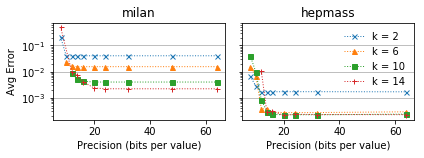

In [200]:
df_milan_merge = pd.read_csv("../javamsketch/results/precision_merge_milan.csv")
df_hepmass_merge = pd.read_csv("../javamsketch/results/precision_merge_hepmass.csv")
_ = gen_plot([df_milan_merge, df_hepmass_merge], [sorted_data_milan_full, sorted_data_hepmass], ["milan", "hepmass"])